## Cluster State

A cluster state is a type of **highly entangled quantum state** used in quantum computing, particularly in the **measurement-based quantum computing** (MBQC) **model**. In this model, computations are performed by **creating a cluster state and then performing sequences of measurements on the qubits**, rather than directly manipulating the qubits via quantum gates.

In a 1D or 2D lattice of qubits, **each qubit is entangled with its neighbors**, forming a **grid-like structure** of entanglement. This entanglement is what defines the cluster state and allows for quantum information processing.

## Excitation in a Cluster State

An excitation in a cluster state typically refers to a **deviation from the "ground state"** or **the lowest energy configuration of the quantum system**. In a simple physical analogy, think of the ground state as a calm, stable system (like a flat surface), and an excitation would be a disturbance, such as a ripple or bump.

In quantum systems, **excitations often correspond to the presence of quasi-particles or other phenomena** that represent a **change** in the quantum state. In the context of a cluster state, an excitation might be the result of a certain qubit or group of qubits being in a different quantum state than expected, disrupting the overall entanglement or causing some detectable change in the quantum correlations across the state.

## Notebook Goal

It demonstrates how to detect **certain properties of a quantum data source**, such as a quantum sensor or a complex simulation from a device. The quantum data source being a **cluster state** that **may or may not have an excitation**—**what the QCNN will learn to detect** (The dataset used in the paper was SPT phase classification).

## SPT Phase Classification Dataset

**Condensed matter physics** is the study of **solid and liquid matter**, focusing on **how large collections of particles** (like atoms or electrons) **behave**. It's the field of physics that helps us understand the properties of materials.

In physics, **symmetry-breaking** happens when a system that initially has a certain symmetry **loses that symmetry as it changes state**. For example, a **liquid** is symmetric because **it looks the same in all directions**. However, when it **freezes into a crystal**, the atoms arrange in a repeating pattern, **breaking that symmetry** (because the crystal looks different depending on how you look at it).

**Traditional symmetry-breaking** is how we usually **describe changes in phases** of matter—like the change from liquid water to solid ice, or the way materials become magnetic when their atoms align in a specific direction. In these cases, the phase of matter changes by breaking a certain symmetry.

In physics, **topological phases** refer to **special phases of matter** that **aren't explained by traditional symmetry-breaking**. Instead of being defined by how atoms are arranged or aligned, these phases are **defined by more abstract, "global" properties that can’t easily change**. These properties are often **"protected" by certain symmetries**—meaning that **as long as those symmetries are maintained**, the system’s **topological properties remain stable**, even if you disturb the system (for example, by adding small impurities or defects).

**SPT phases** are topological phases of matter that are stable as long as certain symmetries are present. These phases can’t be described by traditional symmetry-breaking (like in magnets or crystals), but they are still robust because they are "protected" by symmetry. Even though there's no local order (like a crystal pattern), the system **still has some topological structure**.

For example, certain types of quantum materials can exhibit **edge states**—special particles or properties that only appear at the boundaries (like the edges of a material). These edge states are protected by the material's topology and symmetry, and **they persist even when you disturb the material, as long as the symmetry is not broken**.

In the context of quantum computation and machine learning, the **SPT phase classification dataset** refers to a **collection of quantum states** (often **cluster states**) that belong to **different topological phases**. The goal of classification is to determine whether **a given quantum state belongs to one phase or another**. These **phases** can exhibit certain **symmetries and topological properties** that make them **distinct** from one another, despite not being distinguished by local order parameters (like magnetization in classical systems).

In [1]:
!pip install tensorflow==2.15.0
!pip install tensorflow-quantum==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [3]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

#A- Build the QCNN

## 1- Assemble circuits in a TensorFlow graph

TensorFlow Quantum (TFQ) provides layer classes designed for in-graph circuit construction. One example is the tfq.layers.AddCircuit layer that inherits from tf.keras.Layer. This layer can either **prepend or append** to the input batch of circuits, as shown in the following figure.

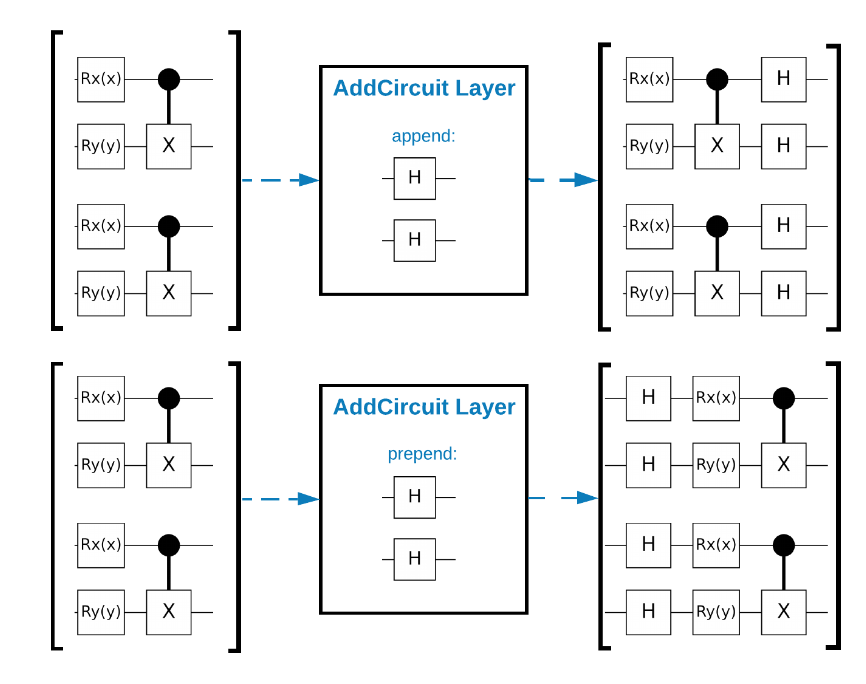

In [4]:
qubit=cirq.GridQubit(0,0)

In [5]:
X_circuit=cirq.Circuit(cirq.X(qubit))
H_circuit=cirq.Circuit(cirq.H(qubit))
input_circuit=[X_circuit,H_circuit]
#Convert the input circuit to a tensor
input_circuit_tensor=tfq.convert_to_tensor((input_circuit))

In [6]:
tfq.from_tensor(input_circuit_tensor)

array([cirq.Circuit([
           cirq.Moment(
               cirq.X(cirq.GridQubit(0, 0)),
           ),
       ])                                   ,
       cirq.Circuit([
           cirq.Moment(
               cirq.H(cirq.GridQubit(0, 0)),
           ),
       ])                                   ], dtype=object)

In [7]:
y_circuit = cirq.Circuit(cirq.Y(qubit))

In [8]:
y_appender = tfq.layers.AddCircuit()

In [9]:
# Run our circuit tensor through the layer and save the output.
output_circuit_tensor=y_appender(input_circuit_tensor,append=y_circuit)

In [10]:
tfq.from_tensor(output_circuit_tensor)

array([cirq.Circuit([
           cirq.Moment(
               cirq.X(cirq.GridQubit(0, 0)),
           ),
           cirq.Moment(
               cirq.Y(cirq.GridQubit(0, 0)),
           ),
       ])                                   ,
       cirq.Circuit([
           cirq.Moment(
               cirq.H(cirq.GridQubit(0, 0)),
           ),
           cirq.Moment(
               cirq.Y(cirq.GridQubit(0, 0)),
           ),
       ])                                   ], dtype=object)

While it is possible to run the examples below without using tfq.layers.AddCircuit, it's a good opportunity to understand how complex functionality can be embedded into TensorFlow compute graphs.

## 2- Problem overview

**Prepare** a **cluster state** and train a quantum **classifier** to **detect if it is "excited" or not**.

 The cluster state is highly entangled but not necessarily difficult for a classical computer. For clarity, this is a simpler dataset than the one used in the paper.

Classification task: implement a **deep MERA-like QCNN architecture** .

**MERA (Multiscale Entanglement Renormalization Ansatz)** is a technique used in quantum physics to **simplify highly entangled systems**. Think of it as a method to reduce the complexity of the entanglement between qubits, making the data easier to work with.

This architecture should be effective at reducing entanglement, obtaining the classification by reading out a single qubit.

**An "excited" cluster state is defined as a cluster state that had a cirq.rx gate applied to any of its qubits.**

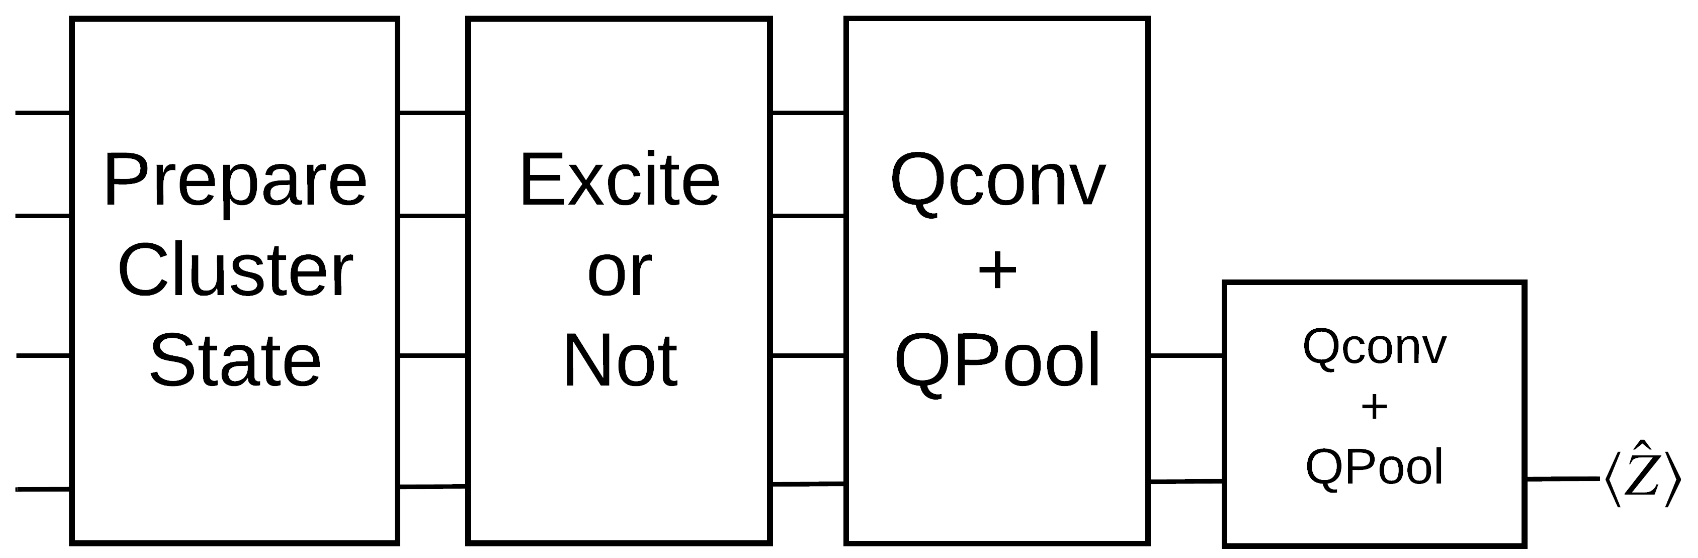

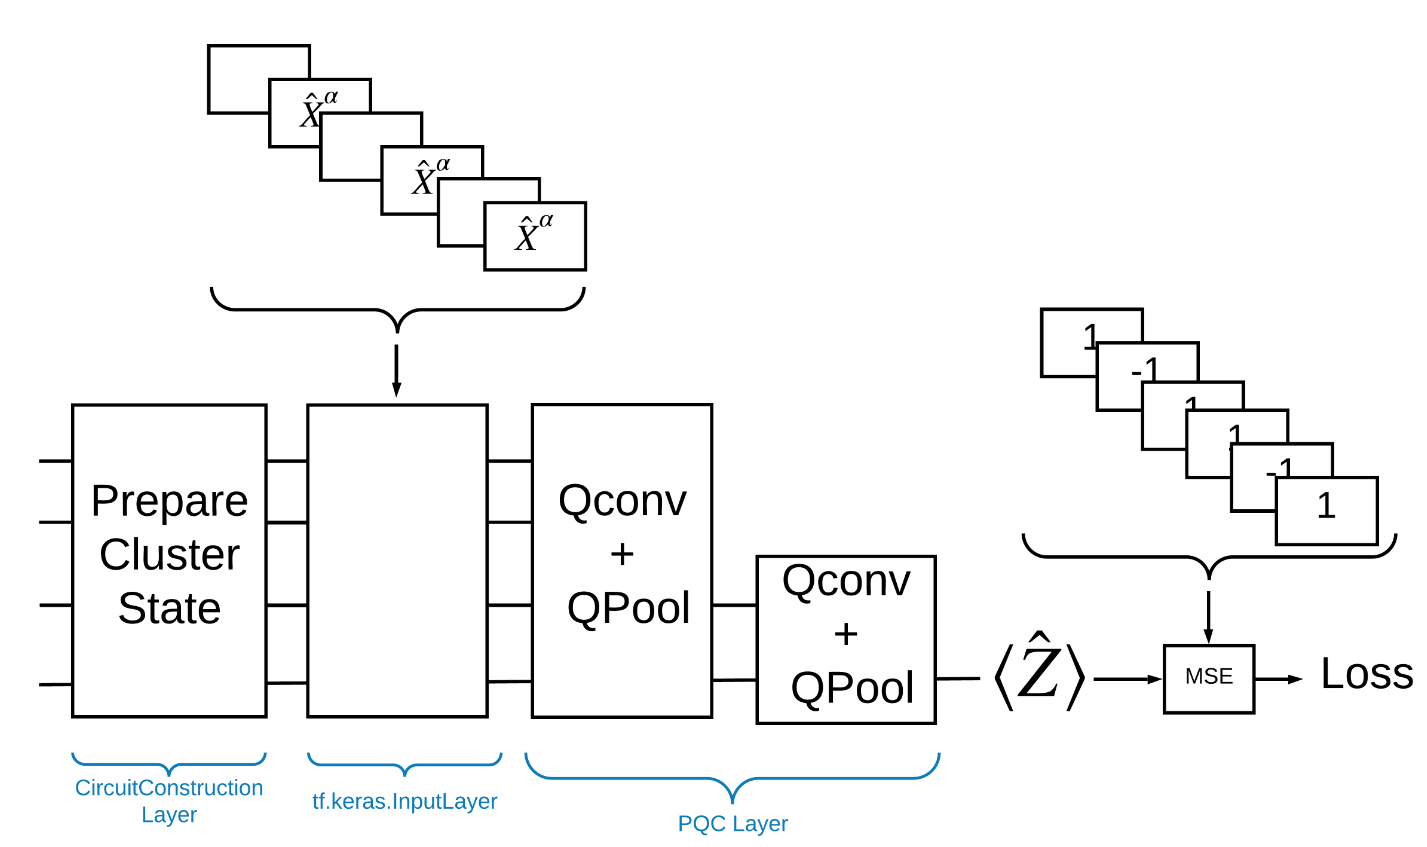

## 3- Generate Quantum Data

In this case it's going to be excitations to the cluster state (The original paper uses a more complicated dataset). **Excitations are represented with cirq.rx gates**. A **large enough rotation** is deemed an **excitation** and is **labeled 1** and a rotation that **isn't large enough** is labeled **-1** and deemed not an excitation.

In [11]:
def generate_data (qubits):
  # Produces n_rounds * n_qubits datapoints
  n_rounds=20
  excitations=[]
  labels=[]
  for n in range(n_rounds):
    for qubit in qubits:
      rot_angle=np.random.uniform(-np.pi,np.pi)
      excitations.append(cirq.Circuit(cirq.rx(rot_angle)(qubit)))
      labels.append(1 if (-np.pi / 2) <= rot_angle <= (np.pi / 2) else -1)
  #split into train and test
  split_idx=int(len(excitations)*0.7)
  train_excitations,train_labels=excitations[:split_idx],labels[:split_idx]
  test_excitations,test_labels=excitations[split_idx:],labels[split_idx:]

  return tfq.convert_to_tensor(train_excitations), np.array(train_labels), \
        tfq.convert_to_tensor(test_excitations), np.array(test_labels)

In [12]:
sample_points, sample_labels, _, __ = generate_data(cirq.GridQubit.rect(1, 4))
print('Input:', tfq.from_tensor(sample_points)[0], 'Output:', sample_labels[0])
print('Input:', tfq.from_tensor(sample_points)[1], 'Output:', sample_labels[1])

Input: (0, 0): ───X^-0.722─── Output: -1
Input: (0, 1): ───X^-0.48─── Output: 1


## 4- Define layers

**Cluster state**

Since this is a static part of the model, embed it using the tfq.layers.AddCircuit functionality.

The **Hadamard gate** puts the qubit into a **superposition**, meaning each qubit will now be in a **mix of the |0⟩ and |1⟩ states**. This is the first step in creating a cluster state, where each qubit becomes a superposition of states.

The **CZ gate** applies an **entanglement** between two qubits. Specifically, it applies a **Z (phase flip)** to the second qubit only **if the first qubit is in state |1⟩**.

In [13]:
def cluster_state_circuit(qubits):
  circuit=cirq.Circuit()
  #Apply Hadamard Gate
  circuit.append(cirq.H.on_each(qubits))
  #Entangle Each Qubit with the Next Using Controlled-Z (CZ) Gates
  #bits[1:] + [bits[0]] shifts the list of qubits by one and wraps around, so the last qubit is paired with the first qubit
  for this_bit,next_bit in zip(qubits,qubits[1:]+[qubits[0]]):
    circuit.append(cirq.CZ(this_bit,next_bit))
  return circuit

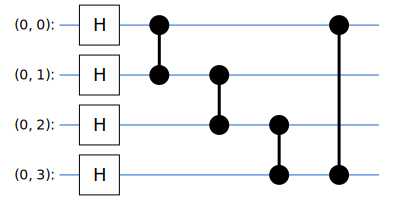

In [14]:
SVGCircuit(cluster_state_circuit(cirq.GridQubit.rect(1, 4)))

**QCNN layers**

**One- and Two-Qubit Parameterized Unitary Matrices**:
- A **unitary matrix** is a basic operation in quantum mechanics that represents how qubits evolve over time. Unitary matrices are **reversible**, which is key in quantum computing.
- A parameterized unitary means that the matrix depends on one or more variables (parameters). These parameters are usually **adjusted during training**, just like weights in classical neural networks.
- **The Tucci paper** provides the **design** for these parameterized unitary matrices, which are needed for the quantum gates in the model.

**Type of Rotation:**

1. cirq.X(bit)**symbols[0]:
This specifically applies the Pauli X gate, which represents **a 180-degree rotation (flip) around the X-axis**.
The exponent **symbols[0]** can be thought of as indicating **how many times to apply the X gate**, effectively **allowing for a parameterized operation**.
However, it is still fundamentally a binary operation (i.e., 0 or 1) for a single application of X gate, and it does not specify a continuous rotation like rx.

2. cirq.rx(theta):
This gate explicitly allows for **any rotation angle theta**, meaning you can **rotate the qubit state by any degree (not just 0 or 180)**.
The formula for rx gives a continuous range of rotations about the X-axis, allowing for more flexible and nuanced manipulation of the qubit's state.

In [15]:
def one_qubit_unitary(qubit,symbols):
  """
  Does a rotation of the Bloch sphere around X,Y and Z axis
  symbols exponents for the rotation gates."""
  return cirq.Circuit(
      cirq.X(qubit)**symbols[0],
      cirq.Y(qubit)**symbols[1],
      cirq.Z(qubit)**symbols[2]
  )

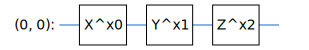

In [16]:
SVGCircuit(one_qubit_unitary(cirq.GridQubit(0, 0), sympy.symbols('x0:3')))

1. The ZZ gate introduces an **entangling interaction** that depends on the states of **both qubits**, with a rotation parameterized by symbols[6].
2. Same for XX and YY.
3. the * operator is used to unpack a list/tuple into individual arguments

In [17]:
def two_qubit_unitary(qubits,symbols):
  circuit=cirq.Circuit()
  #First unitary gate
  circuit+=one_qubit_unitary(qubits[0],symbols[0:3])
  #Second unitary gate
  circuit+=one_qubit_unitary(qubits[1],symbols[3:6])
  ##ZZ 2-qubit gate
  circuit+=[cirq.ZZ(*qubits)**symbols[6]]
  ##YY 2-qubit gate
  circuit+=[cirq.YY(*qubits)**symbols[7]]
  ##XX 2-qubit gate
  circuit+=[cirq.XX(*qubits)**symbols[8]]
  #Third unitary gate
  circuit+=one_qubit_unitary(qubits[0],symbols[9:12])
  #Fourth unitary gate
  circuit+=one_qubit_unitary(qubits[1],symbols[12:])
  return circuit


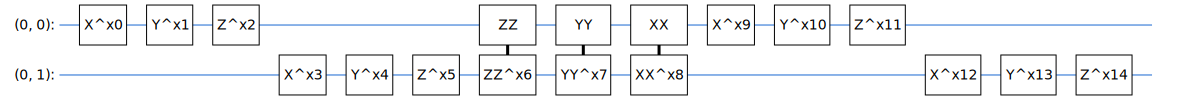

In [18]:
SVGCircuit(two_qubit_unitary(cirq.GridQubit.rect(1, 2), sympy.symbols('x0:15')))

**Two-Qubit Pooling Operation:**
- In classical convolutional neural networks (CNNs), pooling layers reduce the size of the data while retaining important features.
- In a quantum pooling operation, you do something similar: you **reduce the number of qubits** by **merging information** from **pairs of qubits** using a special **two-qubit operation**.
This helps reduce complexity and makes the network more efficient.

The function two_qubit_pool creates a quantum circuit in Cirq that performs a **parameterized "pooling"** operation aimed at **reducing the entanglement between two qubits**, effectively **consolidating their states into a single qubit**.

1. **source_qubit**: **The qubit from which the entanglement is being reduced** (input qubit).
2. **sink_qubit**: **The qubit that will absorb the information from the source qubit** (output qubit).

In [19]:
def two_qubit_pool(source_qubit,sink_qubit,symbols):
  pool_circuit=cirq.Circuit()
  sink_basis_selector=one_qubit_unitary(sink_qubit,symbols[0:3])
  source_basis_selector=one_qubit_unitary(source_qubit,symbols[3:6])
  pool_circuit.append(sink_basis_selector)
  pool_circuit.append(source_basis_selector)
  # The CNOT operation is crucial for transferring the information from
  #the source qubit to the sink qubit and creating entanglement.
  pool_circuit.append(cirq.CNOT(source_qubit,sink_qubit))
  pool_circuit.append(sink_basis_selector**-1)
  return pool_circuit

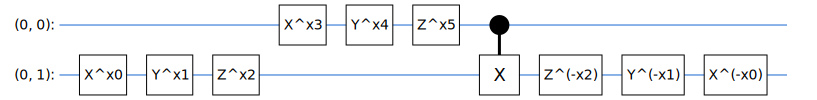

In [20]:
SVGCircuit(two_qubit_pool(*cirq.GridQubit.rect(1, 2), sympy.symbols('x0:6')))

**Quantum convolution**

The **Cong and Lukin paper**, define the **1D quantum convolution** as the application of a **two-qubit parameterized unitary** to every **pair of adjacent qubits** with a **stride of 1**.

In [21]:
def quantum_conv_circuit(qubits,symbols):
  circuit=cirq.Circuit()
  #Pairing EVEN Indexed Qubits
  #bits[0::2] selects all qubits at even indices.
  #bits[1::2] selects all qubits at odd indices.
  for first,second in zip(qubits[0::2],qubits[1::2]):
    circuit+=two_qubit_unitary([first,second],symbols)
  #Pairing ODD Indexed Qubits
  for first,second in zip(qubits[1::2],qubits[2::2]+[qubits[0]]):
    circuit+=two_qubit_unitary([first,second],symbols)
  return circuit

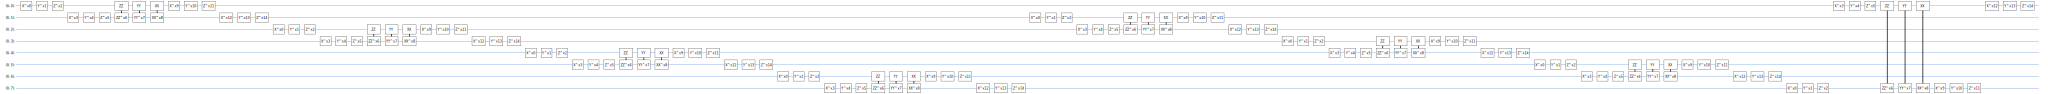

In [22]:
SVGCircuit(quantum_conv_circuit(cirq.GridQubit.rect(1, 8), sympy.symbols('x0:15')))

**Quantum pooling**

A quantum pooling layer pools **from N qubits to N/2 qubits** using the two-qubit pool defined above.

In [23]:
def quantum_pool_circuit(source_qubits,sink_qubits,symbols):
  pool_circuit=cirq.Circuit()
  for src,sink in zip(source_qubits,sink_qubits):
    pool_circuit+=(two_qubit_pool(src,sink,symbols))
  return pool_circuit


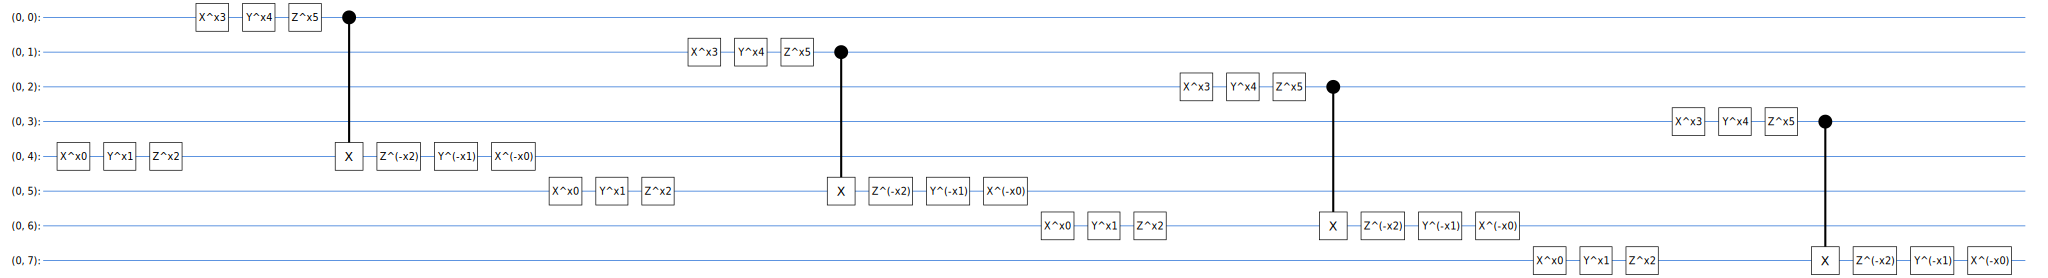

In [24]:
test_bits = cirq.GridQubit.rect(1, 8)

SVGCircuit(quantum_pool_circuit(test_bits[:4], test_bits[4:], sympy.symbols('x0:6')))

## 5- Define the model

We'll start with eight qubits, pool down to one, then measure < Z > .

In [33]:
def create_model_circuit(qubits):
  model_circuit=cirq.Circuit()
  #(15 for conv + 6 for pool)*3 = 63
  symbols=sympy.symbols('qconv0:63')
  #1st
  model_circuit+= quantum_conv_circuit(qubits,symbols[0:15])
  model_circuit+= quantum_pool_circuit(qubits[:4],qubits[4:],symbols[15:21])
  #2nd
  model_circuit+= quantum_conv_circuit(qubits,symbols[21:36])
  model_circuit+= quantum_pool_circuit(qubits[:4],qubits[4:],symbols[36:42])
  #3rd
  model_circuit+= quantum_conv_circuit(qubits,symbols[42:57])
  model_circuit+= quantum_pool_circuit(qubits[:4],qubits[4:],symbols[57:63])
  return model_circuit

In [26]:
cluster_state_bits = cirq.GridQubit.rect(1, 8)
cluster_state_bits[-1]

cirq.GridQubit(0, 7)

**Readout operations** refer to the **measurements** performed on qubits to extract information **after a quantum circuit has been executed** .

In [27]:
readout_operators = cirq.Z(cluster_state_bits[-1])

This defines a **readout operator** that will measure the last qubit in the array (cluster_state_bits[-1]) along the Z-axis (using the Pauli-Z operator).
This means that, after executing the quantum circuit, you will **measure whether the last qubit is in the |0⟩ state (associated with the result 1)** or **the |1⟩ state (associated with the result -1).**

**The Pauli-Z operator** has **2 eigenvalues: +1 and -1**.
1. If a qubit is in the |0⟩ state (which corresponds to the **"up" state** along the **Z-axis** in the Bloch sphere), the result of the measurement in the Pauli-Z basis will yield the **eigenvalue +1**.
2. If a qubit is in the |1⟩ state (which corresponds to the "**down**" state along the Z-axis), the result of the measurement will yield the **eigenvalue -1**.

In [28]:
excitation_input=tf.keras.Input(shape=(),dtype=tf.dtypes.string)

In [30]:
cluster_state=tfq.layers.AddCircuit()(excitation_input,prepend=cluster_state_circuit(cluster_state_bits))

In [34]:
quantum_model = tfq.layers.PQC(create_model_circuit(cluster_state_bits),
                               readout_operators)(cluster_state)

In [35]:
qcnn_model=tf.keras.Model(inputs=[excitation_input],outputs=[quantum_model])

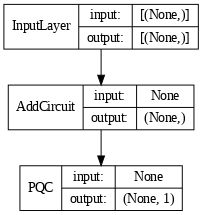

In [36]:
tf.keras.utils.plot_model(qcnn_model,
                          show_shapes=True,
                          show_layer_names=False,
                          dpi=70)

In [41]:
train_excitations,train_labels,test_excitations,test_labels=generate_data(cluster_state_bits)

**@tf.function** : decorator that transforms a **Python function into a TensorFlow graph**. This conversion brings **performance optimization**s because operations in a TensorFlow graph are more efficient than executing Python code directly.

In [44]:
@tf.function
def custom_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true)
    y_pred = tf.map_fn(lambda x: 1.0 if x >= 0 else -1.0, y_pred)
    return tf.keras.backend.mean(tf.keras.backend.equal(y_true, y_pred))

**tf.keras.backend.equal(y_true, y_pred)** :checks element-wise if the true values (y_true) are equal to the predicted values (y_pred). It returns a tensor of boolean values (True for matches, False for mismatches).

**tf.keras.backend.mean** then calculates the mean of these boolean values (converting True to 1 and False to 0), effectively giving the proportion of correct predictions, which represents the accuracy.

In [45]:
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                   loss=tf.losses.mse,
                   metrics=[custom_accuracy])

In [46]:
history = qcnn_model.fit(x=train_excitations,
                         y=train_labels,
                         batch_size=16,
                         epochs=25,
                         verbose=1,
                         validation_data=(test_excitations, test_labels))

Epoch 1/25
7/7 [==============================] - 4s 387ms/step - loss: 0.9199 - custom_accuracy: 0.6875 - val_loss: 0.8640 - val_custom_accuracy: 0.7500
Epoch 2/25
7/7 [==============================] - 2s 269ms/step - loss: 0.8430 - custom_accuracy: 0.6964 - val_loss: 0.8181 - val_custom_accuracy: 0.6458
Epoch 3/25
7/7 [==============================] - 3s 442ms/step - loss: 0.8073 - custom_accuracy: 0.6964 - val_loss: 0.8179 - val_custom_accuracy: 0.6250
Epoch 4/25
7/7 [==============================] - 2s 301ms/step - loss: 0.7530 - custom_accuracy: 0.7589 - val_loss: 0.7950 - val_custom_accuracy: 0.6875
Epoch 5/25
7/7 [==============================] - 2s 284ms/step - loss: 0.7233 - custom_accuracy: 0.7946 - val_loss: 0.7841 - val_custom_accuracy: 0.6667
Epoch 6/25
7/7 [==============================] - 3s 438ms/step - loss: 0.6957 - custom_accuracy: 0.8304 - val_loss: 0.7648 - val_custom_accuracy: 0.6875
Epoch 7/25
7/7 [==============================] - 2s 257ms/step - loss: 0.69

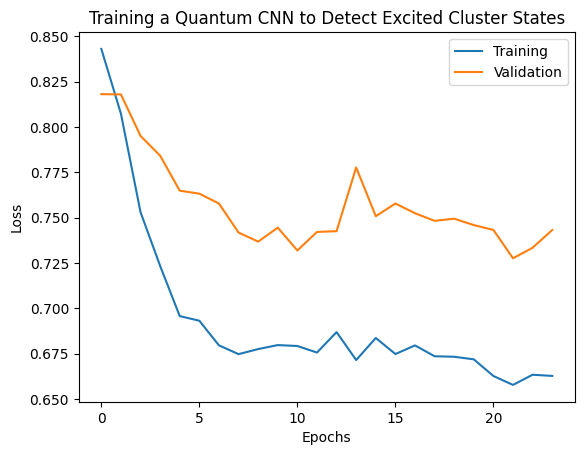

In [47]:
plt.plot(history.history['loss'][1:], label='Training')
plt.plot(history.history['val_loss'][1:], label='Validation')
plt.title('Training a Quantum CNN to Detect Excited Cluster States')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# B- Hybrid Model

We don't have to go from eight qubits to one qubit using quantum convolution—we could have done **one or two rounds of quantum convolution and fed the results into a classical NN**. This section explores quantum-classical hybrid models.

## 1- Hybrid model with a single quantum filter

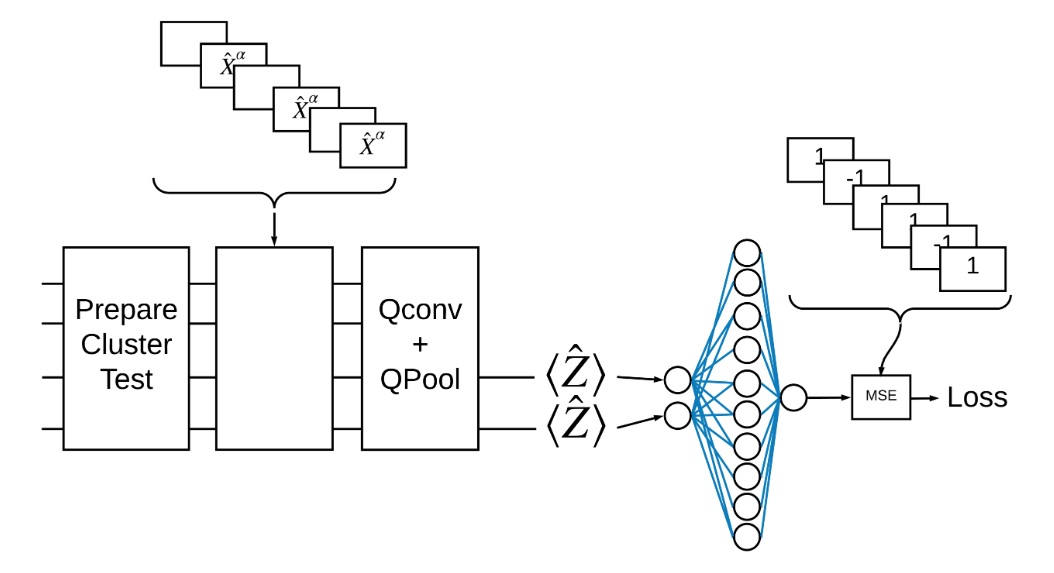

In [49]:
readouts = [cirq.Z(bit) for bit in cluster_state_bits[4:]]

In [50]:
def multi_readout_model_circuit(qubits):
    model_circuit = cirq.Circuit()
    symbols = sympy.symbols('qconv0:21')
    model_circuit += quantum_conv_circuit(qubits, symbols[0:15])
    model_circuit += quantum_pool_circuit(qubits[:4], qubits[4:],
                                          symbols[15:21])
    return model_circuit

In [51]:
excitation_input_dual = tf.keras.Input(shape=(), dtype=tf.dtypes.string)

In [52]:
cluster_state_dual = tfq.layers.AddCircuit()(excitation_input_dual, prepend=cluster_state_circuit(cluster_state_bits))

In [53]:
quantum_model_dual = tfq.layers.PQC(multi_readout_model_circuit(cluster_state_bits),readouts)(cluster_state_dual)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [54]:
d1_dual = tf.keras.layers.Dense(8)(quantum_model_dual)

d2_dual = tf.keras.layers.Dense(1)(d1_dual)

In [56]:
hybrid_model = tf.keras.Model(inputs=[excitation_input_dual], outputs=[d2_dual])

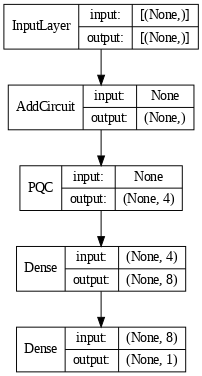

In [57]:
tf.keras.utils.plot_model(hybrid_model,
                          show_shapes=True,
                          show_layer_names=False,
                          dpi=70)

In [58]:
hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                     loss=tf.losses.mse,
                     metrics=[custom_accuracy])

In [59]:
hybrid_history = hybrid_model.fit(x=train_excitations,
                                  y=train_labels,
                                  batch_size=16,
                                  epochs=30,
                                  verbose=1,
                                  validation_data=(test_excitations,
                                                   test_labels))

Epoch 1/30
7/7 [==============================] - 2s 141ms/step - loss: 1.0396 - custom_accuracy: 0.4821 - val_loss: 0.9656 - val_custom_accuracy: 0.6042
Epoch 2/30
7/7 [==============================] - 1s 104ms/step - loss: 0.7531 - custom_accuracy: 0.7589 - val_loss: 0.5389 - val_custom_accuracy: 0.9375
Epoch 3/30
7/7 [==============================] - 1s 102ms/step - loss: 0.3621 - custom_accuracy: 0.9464 - val_loss: 0.2525 - val_custom_accuracy: 0.9583
Epoch 4/30
7/7 [==============================] - 1s 99ms/step - loss: 0.2805 - custom_accuracy: 0.9196 - val_loss: 0.2527 - val_custom_accuracy: 0.9792
Epoch 5/30
7/7 [==============================] - 1s 97ms/step - loss: 0.2430 - custom_accuracy: 0.9643 - val_loss: 0.2307 - val_custom_accuracy: 0.9792
Epoch 6/30
7/7 [==============================] - 1s 102ms/step - loss: 0.2263 - custom_accuracy: 0.9643 - val_loss: 0.2408 - val_custom_accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 1s 99ms/step - loss: 0.2097 

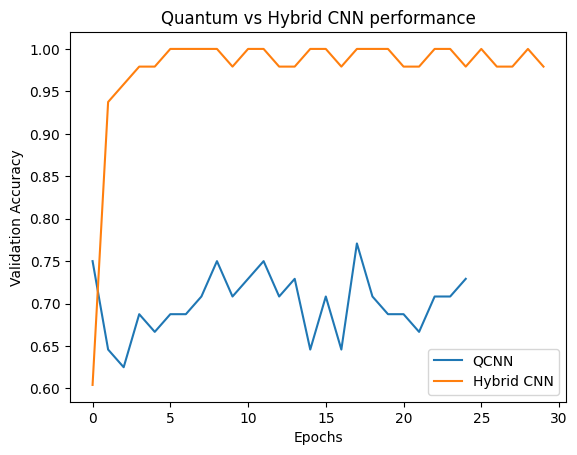

In [60]:
plt.plot(history.history['val_custom_accuracy'], label='QCNN')
plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()

## 2- Hybrid convolution with multiple quantum filters

In [63]:
excitation_input_multi=tf.keras.Input(shape=(),dtype=tf.dtypes.string)

In [64]:
cluster_state_multi=tfq.layers.AddCircuit()(excitation_input_multi,prepend=cluster_state_circuit(cluster_state_bits))

Apply 3 different filters and measure expectation values

In [65]:
quantum_model_multi1=tfq.layers.PQC(multi_readout_model_circuit(cluster_state_bits),readouts)(cluster_state_multi)
quantum_model_multi2=tfq.layers.PQC(multi_readout_model_circuit(cluster_state_bits),readouts)(cluster_state_multi)
quantum_model_multi3=tfq.layers.PQC(multi_readout_model_circuit(cluster_state_bits),readouts)(cluster_state_multi)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values e

Concatenate outputs and feed into a small classical NN

In [66]:
concat_out=tf.keras.layers.concatenate([quantum_model_multi1,quantum_model_multi2,quantum_model_multi3])

In [68]:
dense1=tf.keras.layers.Dense(8)(concat_out)
dense2=tf.keras.layers.Dense(1)(dense1)

In [69]:
multi_qconv_model=tf.keras.Model(inputs=[excitation_input_multi],
                                 outputs=[dense2])

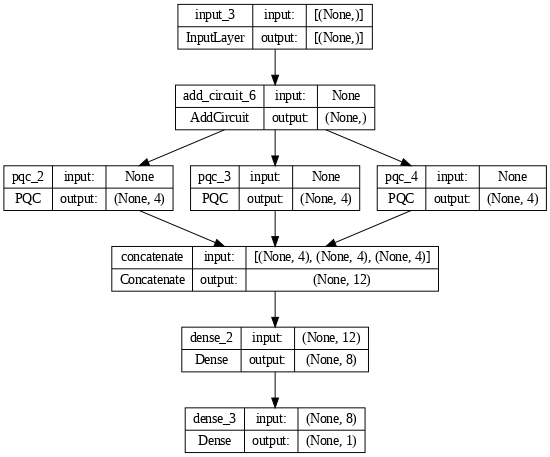

In [70]:
tf.keras.utils.plot_model(multi_qconv_model,
                          show_shapes=True,
                          show_layer_names=True,
                          dpi=70)

In [71]:
multi_qconv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    loss=tf.losses.mse,
    metrics=[custom_accuracy])

multi_qconv_history = multi_qconv_model.fit(x=train_excitations,
                                            y=train_labels,
                                            batch_size=16,
                                            epochs=30,
                                            verbose=1,
                                            validation_data=(test_excitations,
                                                             test_labels))

Epoch 1/30
7/7 [==============================] - 6s 340ms/step - loss: 0.8338 - custom_accuracy: 0.6696 - val_loss: 0.7173 - val_custom_accuracy: 0.7083
Epoch 2/30
7/7 [==============================] - 2s 292ms/step - loss: 0.5206 - custom_accuracy: 0.8214 - val_loss: 0.4298 - val_custom_accuracy: 0.9167
Epoch 3/30
7/7 [==============================] - 4s 627ms/step - loss: 0.2977 - custom_accuracy: 0.9375 - val_loss: 0.2874 - val_custom_accuracy: 0.8958
Epoch 4/30
7/7 [==============================] - 3s 400ms/step - loss: 0.2339 - custom_accuracy: 0.9821 - val_loss: 0.2517 - val_custom_accuracy: 0.9792
Epoch 5/30
7/7 [==============================] - 3s 438ms/step - loss: 0.2411 - custom_accuracy: 0.9375 - val_loss: 0.2372 - val_custom_accuracy: 0.9792
Epoch 6/30
7/7 [==============================] - 2s 292ms/step - loss: 0.2031 - custom_accuracy: 0.9732 - val_loss: 0.2707 - val_custom_accuracy: 0.9375
Epoch 7/30
7/7 [==============================] - 2s 246ms/step - loss: 0.21

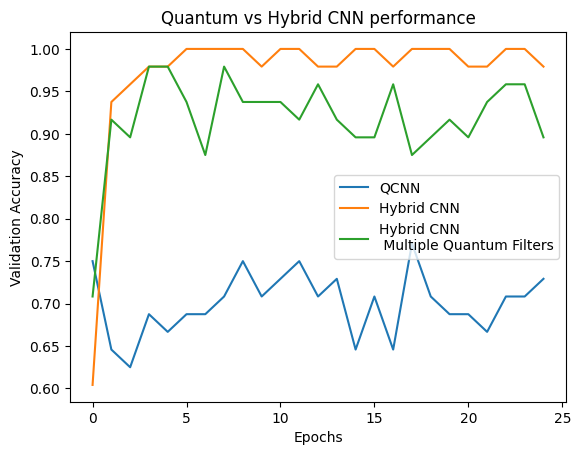

In [72]:
plt.plot(history.history['val_custom_accuracy'][:25], label='QCNN')
plt.plot(hybrid_history.history['val_custom_accuracy'][:25], label='Hybrid CNN')
plt.plot(multi_qconv_history.history['val_custom_accuracy'][:25],
         label='Hybrid CNN \n Multiple Quantum Filters')
plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()